- Read weather.csv into a DataFrame named weather.
- Select the temperature columns (TMIN, TAVG, TMAX) and print their summary statistics using the .describe() method.
- Create a box plot to visualize the temperature columns.
- Display the plot.

              TMIN         TAVG         TMAX
count  4017.000000  1217.000000  4017.000000
mean     43.484441    52.493016    61.268608
std      17.020298    17.830714    18.199517
min      -5.000000     6.000000    15.000000
25%      30.000000    39.000000    47.000000
50%      44.000000    54.000000    62.000000
75%      58.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000


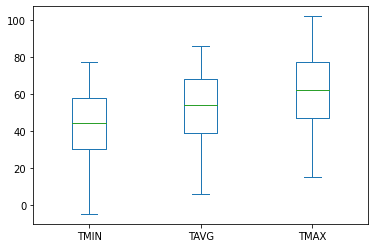

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# Read 'weather.csv' into a DataFrame named 'weather'
weather = pd.read_csv('weather.csv')

# Describe the temperature columns
print(weather[['TMIN', 'TAVG', 'TMAX']].describe())

# Create a box plot of the temperature columns
weather[['TMIN', 'TAVG', 'TMAX']].plot(kind='box')

# Display the plot
plt.show()

- Create a new column in the weather DataFrame named TDIFF that represents the difference between the maximum and minimum temperatures.
- Print the summary statistics for TDIFF using the .describe() method.
- Create a histogram with 20 bins to visualize TDIFF.
- Display the plot.

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64


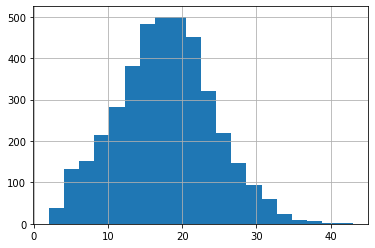

In [4]:
# Create a 'TDIFF' column that represents temperature difference
weather['TDIFF'] = weather['TMAX'] - weather['TMIN'] 

# Describe the 'TDIFF' column
print(weather['TDIFF'].describe())

# Create a histogram with 20 bins to visualize 'TDIFF'
weather['TDIFF'].hist(bins = 20)

# Display the plot
plt.show()

- Copy the columns WT01 through WT22 from weather to a new DataFrame named WT.
- Calculate the sum of each row in WT, and store the results in a new weather column named bad_conditions.
- Replace any missing values in bad_conditions with a 0. (This has been done for you.)
- Create a histogram to visualize bad_conditions, and then display the plot.

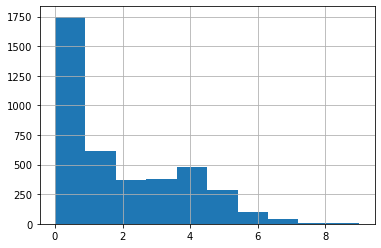

In [6]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:,'WT01' : 'WT22']

# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis = 1)

# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Create a histogram to visualize 'bad_conditions'
weather.bad_conditions.hist()

# Display the plot
plt.show()

- Count the unique values in the bad_conditions column and sort the index. (This has been done for you.)
- Create a dictionary called mapping that maps the bad_conditions integers to the specified strings.
- Convert the bad_conditions integers to strings using the mapping and store the results in a new column called rating.
- Count the unique values in rating to verify that the integers were properly converted to strings.

In [7]:
# Count the unique values in 'bad_conditions' and sort the index
print(weather.bad_conditions.value_counts().sort_index())

# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

# Count the unique values in 'rating'
print(weather['rating'].value_counts())

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64
bad      1836
good     1749
worse     432
Name: rating, dtype: int64


- Create a list object called cats that lists the weather ratings in a logical order: 'good', 'bad', 'worse'.
- Change the data type of the rating column from object to category. Make sure to use the cats list to define the category ordering.
- Examine the head of the rating column to confirm that the categories are logically ordered.

In [9]:
# Create a list of weather ratings in logical order
cats = ['good', 'bad', 'worse']
from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=cats, ordered=True)

# Change the data type of 'rating' to category
weather['rating'] = weather.rating.astype(cat_type)

# Examine the head of 'rating'
print(weather['rating'].head())

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']


- Reset the index of the ri DataFrame.
- Examine the head of ri to verify that stop_datetime is now a DataFrame column, and the index is now the default integer index.
- Create a new DataFrame named weather_rating that contains only the DATE and rating columns from the weather DataFrame.
- Examine the head of weather_rating to verify that it contains the proper columns.

In [10]:
ri = pd.read_csv("police.csv")

# Reset the index of 'ri'
ri.reset_index(inplace = True)

# Examine the head of 'ri'
print(ri.head())

# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather[['DATE' , 'rating']]

# Examine the head of 'weather_rating'
print(weather_rating.head())

   index state   stop_date stop_time  county_name driver_gender driver_race  \
0      0    RI  2005-01-04     12:55          NaN             M       White   
1      1    RI  2005-01-23     23:15          NaN             M       White   
2      2    RI  2005-02-17     04:15          NaN             M       White   
3      3    RI  2005-02-20     17:15          NaN             M       White   
4      4    RI  2005-02-24     01:20          NaN             F       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   
3                Call for Service      Other             False         NaN   
4                        Speeding   Speeding             False         NaN   

    stop_outcome is_arrested stop_duration  drugs_relate

- Examine the shape of the ri DataFrame.
- Merge the ri and weather_rating DataFrames using a left join.
- Examine the shape of ri_weather to confirm that it has two more columns but the same number of rows as ri.
- Replace the index of ri_weather with the stop_datetime column.

In [12]:
# # Examine the shape of 'ri'
# print(ri.shape)

# # Merge 'ri' and 'weather_rating' using a left join
# ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

# # Examine the shape of 'ri_weather'
# print(ri_weather.shape)

# # Set 'stop_datetime' as the index of 'ri_weather'
# ri_weather.set_index('stop_datetime', inplace=True)

- Calculate the overall arrest rate by taking the mean of the is_arrested Series.

In [13]:
# Calculate the overall arrest rate
print(ri_weather.is_arrested.mean())

0.03556777868937704


- Calculate the arrest rate for each weather rating using a .groupby()

In [14]:
# Calculate the arrest rate for each 'rating'
print(ri_weather.groupby('rating').is_arrested.mean())

rating
good     0.033712
bad      0.036261
worse    0.041667
Name: is_arrested, dtype: float64


- Calculate the arrest rate for each combination of violation and rating. How do the arrest rates differ by group?

In [15]:
# Calculate the arrest rate for each 'violation' and 'rating'
print(ri_weather.groupby(['violation' , 'rating']).is_arrested.mean())

violation            rating
Equipment            good      0.058995
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076923
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013404
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64


- Save the output of the .groupby() operation from the last exercise as a new object, arrest_rate. (This has been done for you.)
- Print the arrest_rate Series and examine it.
- Print the arrest rate for moving violations in bad weather.
- Print the arrest rates for speeding violations in all three weather conditions.

In [16]:
# Save the output of the groupby operation from the last exercise
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()

# Print the 'arrest_rate' Series
print(arrest_rate)

# Print the arrest rate for moving violations in bad weather
print(arrest_rate.loc['Moving violation', 'bad'])

# Print the arrest rates for speeding violations in all three weather conditions
print(arrest_rate.loc['Speeding'])

violation            rating
Equipment            good      0.058995
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076923
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013404
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64
0.05804964058049641
rating
good     0.013404
bad      0.013314
worse    0.016886
Name: is_arrested, dtype: float64


- Unstack the arrest_rate Series to reshape it into a DataFrame.
- Create the exact same DataFrame using a pivot table! Each of the three .pivot_table() parameters should be specified as one of the ri_weather columns.

In [17]:
# Unstack the 'arrest_rate' Series into a DataFrame
print(arrest_rate.unstack())

# Create the same DataFrame using a pivot table
print(ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested'))

rating                   good       bad     worse
violation                                        
Equipment            0.058995  0.066311  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076923  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013404  0.013314  0.016886
Empty DataFrame
Columns: []
Index: [Equipment, Moving violation, Other, Registration/plates, Seat belt, Speeding]
